## Capstone Project - The Battle of the Neighborhoods (Week 2)
#### Applied Data Science Capstone by IBM/Coursera

#### Table of contents

- Introduction: Business Problem
- Data
- Methodology
- Analysis
- Results and Discussion
- Conclusion

#### Introduction: Business Problem 

The aim of this project is to find a safe and secure location for opening of commercial establishments in Vancouver, Canada. Specifically, this report will be targeted to stakeholders interested in opening any business place like Barber Shop in Vancouver City, Canada.

The first task would be to choose the safest borough by analysing crime data for opening a Barber Shop and short listing a neighbourhood, where Barber Shops are not amongst the most commom venues, and yet as close to the city as possible.

We will make use of our data science tools to analyse data and focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood where Barber Shop is not amongst the most common venue can be selected.

#### Data 

Based on definition of our problem, factors that will influence our decission are:

- finding the safest borough based on crime statistics
- finding the most common venues
- choosing the right neighbourhood within the borough

We will be using the geographical coordinates of Vancouver to plot neighbourhoods in a borough that is safe and in the city's vicinity, and finally cluster our neighborhoods and present our findings.

Following data sources will be needed to extract/generate the required information:

- Part 1: Using a real world data set from Kaggle containing the Vancouver Crimes from 2003 to 2019: A dataset consisting of the crime statistics of each Neighbourhoof in Vancouver along with type of crime, recorded year, month and hour.

- Part 2: Gathering additional information of the list of officially categorized boroughs in Vancouver from Wikipedia.: Borough information will be used to map the existing data where each neighbourhood can be assigned with the right borough.

- Part 3: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.: This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

- Part 4: Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.: This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

#### Methodology
Categorized the methodologysection into two parts:

- Exploratory Data Analysis: Visualise the crime repots in different Vancouver boroughs to idenity the safest borough and normalise the neighborhoods of that borough. We will Use the resulting data and find 10 most common venues in each neighborhood.

- Modelling: To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.


In [1]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

!pip install opencage
#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

print("@@Libraries Imported@@")



@@Libraries Imported@@


#### Part 1: Using a real world data set from Kaggle containing the Vancouver Crimes

The data comes from the Vancouver Open Data Catalogue.
It was extracted on 2017-07-18 and it contains 530,652 records from 2003-01-01 to 2017-07-13.
The original data set contains coordinates in UTM Zone 10 (columns X and Y). I also included Latitude and Longitude, which I converted using this spreadsheet that can be found here.

There's also a Google Trends data that shows how often a search-term is entered relative to the total search-volume. From Google Trends:

"Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. Likewise a score of 0 means the term was less than 1% as popular as the peak."
Original data for search term "crime" location British Columbia:
https://trends.google.com/trends/explore?date=2004-01-01%202017-06-30&geo=CA-BC&q=crime

In [2]:
vcr_crime_df = pd.read_csv('C:\\Users\\stanislaus.setiadi\\JupiterNoteBook\\CourseraCourse\\Applied_DataScience_CapStone_4\\ST_DataScience_CapStone_Master\\crime.csv', index_col=None)

In [3]:
vcr_crime_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


#### Drop not user column minute, Hundred_Block, X, Y

In [4]:
# Drop not user column minute, Hundred_Block, X, Y
vcr_crime_df.drop(['MINUTE', 'HUNDRED_BLOCK', 'X', 'Y'], axis = 1, inplace = True)
#vcr_crime_df.columns

vcr_crime_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,Strathcona,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,Strathcona,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,Strathcona,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,Strathcona,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,Strathcona,49.269802,-123.083763


In [5]:
# Syncronized the colomn names
vcr_crime_df.columns = ['Type', 'Year','Month','Day','Hour','Neighbourhood', 'Latitude', 'Longitude']
vcr_crime_df.head()

,Type,Year,Month,Day,Hour,Neighbourhood,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,Strathcona,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,Strathcona,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,Strathcona,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,Strathcona,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,Strathcona,49.269802,-123.083763


#### Total Crimes in different Neighborhoods

In [6]:
vcr_crime_df['Neighbourhood'].value_counts()

Central Business District    110947
West End                      41352
Fairview                      32161
Mount Pleasant                30536
Grandview-Woodland            27180
Renfrew-Collingwood           26761
Kitsilano                     26699
Kensington-Cedar Cottage      24941
Strathcona                    20919
Hastings-Sunrise              18126
Sunset                        17396
Marpole                       13083
Riley Park                    12521
Victoria-Fraserview           10819
Killarney                     10475
Oakridge                       8037
Dunbar-Southlands              7746
Kerrisdale                     7447
Arbutus Ridge                  6066
West Point Grey                5871
Shaughnessy                    5426
South Cambie                   5212
Stanley Park                   3775
Musqueam                        532
Name: Neighbourhood, dtype: int64

In [7]:
vcr_crime_df.shape

(530652, 8)

#### Part 2: Gathering additional information about the Neighborhood from Wikipedia

As part of data set Borough which the neighborhood was part of was not categorized, so we will create a dictionary of Neighborhood and based on data in the following Wikipedia page.

URL:https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Vancouver

In [8]:
# define the dataframe columns
column_names = ['Neighbourhood', 'Borough'] 

# instantiate the dataframe
vcr_neigh_bor = pd.DataFrame(columns=column_names)

vcr_neigh_bor['Neighbourhood'] = vcr_crime_df['Neighbourhood'].unique()

dic_neigh_bor = {'Central Business District':'Central', 'West End':'Central', 'Stanley Park':'Central', 'Victoria-Fraserview':'South Vancouver',
                  'Killarney':'South Vancouver', 'Musqueam':'South Vancouver', 'Mount Pleasant':'East Side', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'West Side', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for row, neigh in zip(dic_neigh_bor, vcr_neigh_bor['Neighbourhood']):
    vcr_neigh_bor.loc[vcr_neigh_bor.Neighbourhood == row, 'Borough'] = dic_neigh_bor.get(row)

vcr_neigh_bor.dropna(inplace=True)

print("Total Neighbourhood Count",len(vcr_neigh_bor['Neighbourhood']),"Borough Count",len(vcr_neigh_bor['Borough'].unique()))

vcr_neigh_bor.head()

Total Neighbourhood Count 24 Borough Count 4


,Neighbourhood,Borough
0,Strathcona,East Side
1,Kerrisdale,West Side
2,Dunbar-Southlands,West Side
3,Grandview-Woodland,East Side
4,Sunset,East Side


#### Merging the Crime data Table to include Boroughs

In [9]:
vcr_boroughs_crime = pd.merge(vcr_crime_df, vcr_neigh_bor, on='Neighbourhood')
vcr_boroughs_crime.head()

,Type,Year,Month,Day,Hour,Neighbourhood,Latitude,Longitude,Borough
0,Other Theft,2003,5,12,16.0,Strathcona,49.269802,-123.083763,East Side
1,Other Theft,2003,5,7,15.0,Strathcona,49.269802,-123.083763,East Side
2,Other Theft,2003,4,23,16.0,Strathcona,49.269802,-123.083763,East Side
3,Other Theft,2003,4,20,11.0,Strathcona,49.269802,-123.083763,East Side
4,Other Theft,2003,4,12,17.0,Strathcona,49.269802,-123.083763,East Side


#### Cleansing/Wrangling the data by dropping invalid data

In [10]:
vcr_boroughs_crime.dropna(inplace=True)
vcr_boroughs_crime['Borough'].value_counts()

East Side          178380
Central            156074
West Side          117748
South Vancouver     21826
Name: Borough, dtype: int64

#### Exploratory Data Analysis
#### Pivoting the table the data by crimes per borough

In [11]:
vcr_crime_cat = pd.pivot_table(vcr_boroughs_crime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vcr_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                              12218                              7050   
East Side                            12375                             26727   
South Vancouver                        705                              4715   
West Side                             8544                             22367   
All                                  33842                             60859   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central            22243       25290              67775            10106   
East Side          29184       17470              55407             7639   
South Vancouver     3626         729               7597              302   
West Side          15107        8674              40112             7573   
All                70160       52163             170891            25620   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                     6750   
East Side                  19269   
South Vancouver             2714   
West Side                   9619   
All                        38352   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                         53       
East Side                                                      109       
South Vancouver                                                 23       
West Side                                                       69       
All                                                            254       

                                                                              
Type            Vehicle Collision or Pedestrian Struck (with Injury)     All  
Borough                                                                       
Central                                                       4589    156074  
East Side                                                    10200    178380  
South Vancouver                                               1415     21826  
West Side                                                     5683    117748  
All                                                          21887    474028

#### Merging the Pivot Column 

In [12]:
vcr_crime_cat.reset_index(inplace = True)
vcr_crime_cat.columns = vcr_crime_cat.columns.map(''.join)
vcr_crime_cat.rename(columns={'YearAll':'Total'}, inplace=True)
# Ignore bottom All in Borough
vcr_crime_cat = vcr_crime_cat.head(4)
vcr_crime_cat

,Borough,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,12218,7050,22243,25290,67775,10106,6750,53,4589,156074
1,East Side,12375,26727,29184,17470,55407,7639,19269,109,10200,178380
2,South Vancouver,705,4715,3626,729,7597,302,2714,23,1415,21826
3,West Side,8544,22367,15107,8674,40112,7573,9619,69,5683,117748


#### Smoothing Pivot table by crimes per neighborhood

In [13]:
vcr_crime_neigh = pd.pivot_table(vcr_boroughs_crime,
                               values=['Year'],
                               index=['Neighbourhood'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vcr_crime_neigh

Year  \
Type                      Break and Enter Commercial   
Neighbourhood                                          
Arbutus Ridge                                    325   
Central Business District                       9371   
Dunbar-Southlands                                294   
Fairview                                        3303   
Grandview-Woodland                              2082   
Hastings-Sunrise                                 929   
Kensington-Cedar Cottage                        1277   
Kerrisdale                                       326   
Killarney                                        302   
Kitsilano                                       2092   
Marpole                                         1098   
Mount Pleasant                                  2769   
Musqueam                                          17   
Oakridge                                         332   
Renfrew-Collingwood                             1197   
Riley Park                                       848   
Shaughnessy                                      129   
South Cambie                                     314   
Stanley Park                                      72   
Strathcona                                      2168   
Sunset                                          1105   
Victoria-Fraserview                              386   
West End                                        2775   
West Point Grey                                  331   
All                                            33842   

                                                                      \
Type                      Break and Enter Residential/Other Mischief   
Neighbourhood                                                          
Arbutus Ridge                                          1672      934   
Central Business District                              3505    16672   
Dunbar-Southlands                                      1847     1324   
Fairview                                               3834     3196   
Grandview-Woodland                                     4515     4970   
Hastings-Sunrise                                       3199     2904   
Kensington-Cedar Cottage                               4136     3760   
Kerrisdale                                             1826     1049   
Killarney                                              2130     1761   
Kitsilano                                              4390     3692   
Marpole                                                2527     1905   
Mount Pleasant                                         3278     4070   
Musqueam                                                 86      104   
Oakridge                                               2089      889   
Renfrew-Collingwood                                    4296     3886   
Riley Park                                             2706     1795   
Shaughnessy                                            1774      633   
South Cambie                                           1109      606   
Stanley Park                                             65      246   
Strathcona                                             2019     4556   
Sunset                                                 2578     3243   
Victoria-Fraserview                                    2499     1761   
West End                                               3480     5325   
West Point Grey                                        1299      879   
All                                                   60859    70160   

                                                                           \
Type                      Other Theft Theft from Vehicle Theft of Bicycle   
Neighbourhood                                                               
Arbutus Ridge                     337               1852              160   
Central Business District       19244              48003             6907   
Dunbar-Southlands                 241               2899              240   


#### Merge the Pivot Columns

In [14]:
vcr_crime_neigh.reset_index(inplace = True)
vcr_crime_neigh.columns = vcr_crime_neigh.columns.map(''.join)
vcr_crime_neigh.rename(columns={'YearAll':'Total'}, inplace=True)

vcr_crime_neigh.head()

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,325,1672,934,337,1852,160,498,3,285,6066
1,Central Business District,9371,3505,16672,19244,48003,6907,4016,41,3188,110947
2,Dunbar-Southlands,294,1847,1324,241,2899,240,629,3,269,7746
3,Fairview,3303,3834,3196,3269,11934,3394,2037,14,1180,32161
4,Grandview-Woodland,2082,4515,4970,2508,7342,1403,3111,9,1240,27180


In [15]:
vcr_crime_cat.describe()

,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,8460.500000,15214.750000,17540.000000,13040.750000,42722.750000,6405.000000,9588.000000,63.500000,5471.750000,118507.000000
std,5464.944922,10963.492034,10912.070228,10650.666251,26007.305107,4235.996144,7048.140228,35.828294,3634.897649,69146.818341
min,705.000000,4715.000000,3626.000000,729.000000,7597.000000,302.000000,2714.000000,23.000000,1415.000000,21826.000000
25%,6584.250000,6466.250000,12236.750000,6687.750000,31983.250000,5755.250000,5741.000000,45.500000,3795.500000,93767.500000
50%,10381.000000,14708.500000,18675.000000,13072.000000,47759.500000,7606.000000,8184.500000,61.000000,5136.000000,136911.000000
75%,12257.250000,23457.000000,23978.250000,19425.000000,58499.000000,8255.750000,12031.500000,79.000000,6812.250000,161650.500000
max,12375.000000,26727.000000,29184.000000,25290.000000,67775.000000,10106.000000,19269.000000,109.000000,10200.000000,178380.000000


#### Sorting the data by crimes per neighborhood

In [16]:
vcr_crime_neigh.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

crime_neigh_top5 = vcr_crime_neigh.iloc[1:6]
crime_neigh_top5

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
1,Central Business District,9371,3505,16672,19244,48003,6907,4016,41,3188,110947
22,West End,2775,3480,5325,6033,16904,2985,2660,6,1184,41352
3,Fairview,3303,3834,3196,3269,11934,3394,2037,14,1180,32161
11,Mount Pleasant,2769,3278,4070,3698,9679,2746,2654,18,1624,30536
4,Grandview-Woodland,2082,4515,4970,2508,7342,1403,3111,9,1240,27180


#### Top Five Neighborhoods with highest crimes

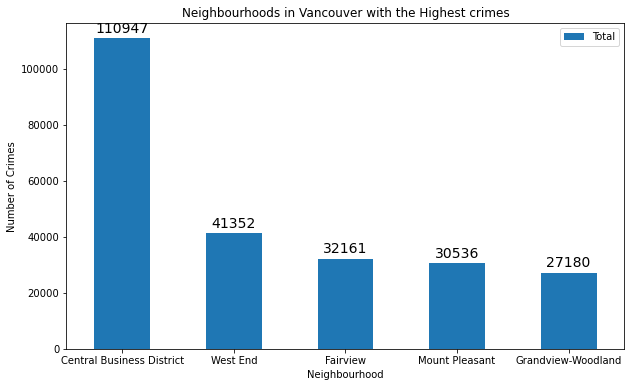

In [17]:
per_neigh = crime_neigh_top5[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [18]:
crime_neigh_low = vcr_crime_neigh.tail(5)
crime_neigh_low

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
23,West Point Grey,331,1299,879,260,1971,372,450,4,305,5871
16,Shaughnessy,129,1774,633,25,1769,139,371,7,579,5426
17,South Cambie,314,1109,606,759,1529,221,435,2,237,5212
18,Stanley Park,72,65,246,13,2868,214,74,6,217,3775
12,Musqueam,17,86,104,1,217,7,40,1,59,532


#### Top Five Neighborhoods with the lowest crimes

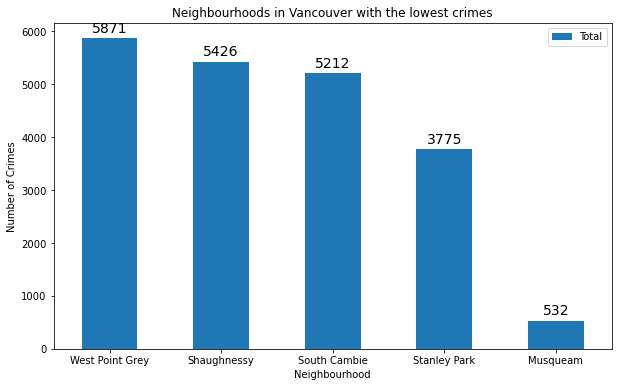

In [19]:
per_neigh = crime_neigh_low[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Vancouver with the lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

#### Borough in Vancouver with Highest Crimes

In [20]:
vcr_crime_cat = pd.pivot_table(vcr_boroughs_crime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vcr_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                              12218                              7050   
East Side                            12375                             26727   
South Vancouver                        705                              4715   
West Side                             8544                             22367   
All                                  33842                             60859   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central            22243       25290              67775            10106   
East Side          29184       17470              55407             7639   
South Vancouver     3626         729               7597              302   
West Side          15107        8674              40112             7573   
All                70160       52163             170891            25620   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                     6750   
East Side                  19269   
South Vancouver             2714   
West Side                   9619   
All                        38352   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                         53       
East Side                                                      109       
South Vancouver                                                 23       
West Side                                                       69       
All                                                            254       

                                                                              
Type            Vehicle Collision or Pedestrian Struck (with Injury)     All  
Borough                                                                       
Central                                                       4589    156074  
East Side                                                    10200    178380  
South Vancouver                                               1415     21826  
West Side                                                     5683    117748  
All                                                          21887    474028

In [21]:
vcr_crime_cat.reset_index(inplace = True)
vcr_crime_cat.columns = vcr_crime_cat.columns.map(''.join)
vcr_crime_cat.rename(columns={'YearAll':'Total',
                              'YearBreak and Enter Commercial' : 'Break & Enter Commercial',
                              'YearBreak and Enter Residential/Other' : 'Break & Enter Residential',
                              'YearMischief' : 'Mischief',
                              'YearOther Theft' : 'Other Theft',
                              'YearTheft from Vehicle' : 'Theft from Vehicle',
                              'YearTheft of Bicycle' : 'Theft of Bicycle',
                              'YearTheft of Vehicle' : 'Theft of Vehicle',
                              'YearVehicle Collision or Pedestrian Struck (with Fatality)' : 'Vehicle Collision or Pedestrian Struck (with Fatality)',
                              'YearVehicle Collision or Pedestrian Struck (with Injury)' : 'Vehicle Collision or Pedestrian Struck (with Injury)'}, inplace=True)
# Ignore bottom All in Borough
vcr_crime_cat = vcr_crime_cat.head(4)
vcr_crime_cat

,Borough,Break & Enter Commercial,Break & Enter Residential,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,12218,7050,22243,25290,67775,10106,6750,53,4589,156074
1,East Side,12375,26727,29184,17470,55407,7639,19269,109,10200,178380
2,South Vancouver,705,4715,3626,729,7597,302,2714,23,1415,21826
3,West Side,8544,22367,15107,8674,40112,7573,9619,69,5683,117748


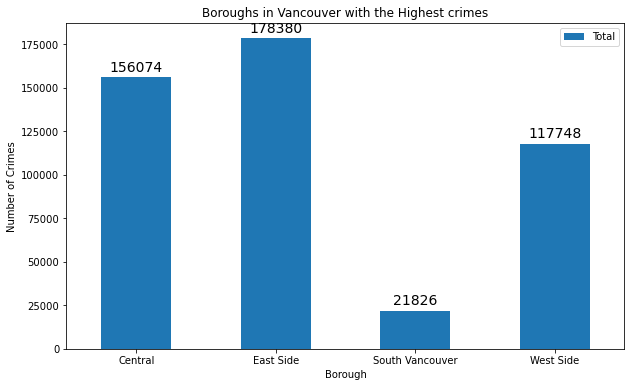

In [22]:
per_borough = vcr_crime_cat[['Borough','Total']]

per_borough.set_index('Borough',inplace = True)

ax = per_borough.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Boroughs in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

### Based on visualized data analysis the South Vancouver has the lowest crimes and the East Side area has the highest crimes

Since South Vancouver has very little number of neighborhoods for opening the commercial area would not be viable, we can find the alternate with the next borough with second lowest crimes which is **West Side**.

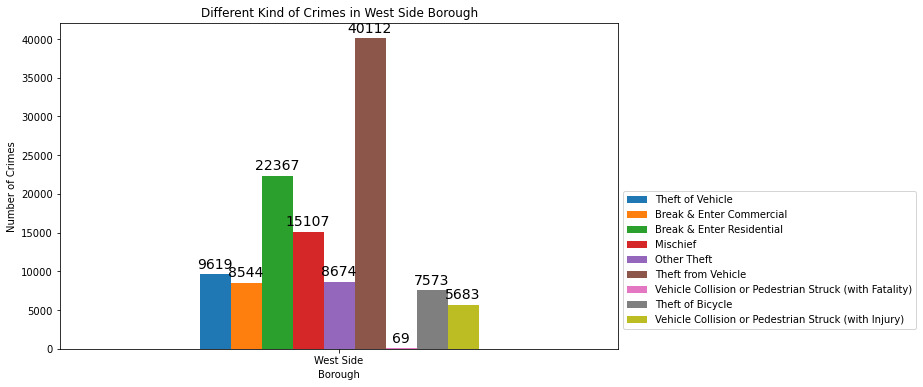

In [23]:
vcr_ws_df = vcr_crime_cat[vcr_crime_cat['Borough'] == 'West Side']
vcr_ws_df = vcr_ws_df.sort_values(['Total'], ascending = True, axis = 0)

vcr_ws = vcr_ws_df[['Borough','Theft of Vehicle', 'Break & Enter Commercial','Break & Enter Residential','Mischief','Other Theft',
                 'Theft from Vehicle','Vehicle Collision or Pedestrian Struck (with Fatality)','Theft of Bicycle',
                 'Vehicle Collision or Pedestrian Struck (with Injury)']]

vcr_ws.set_index('Borough',inplace = True)

ax = vcr_ws.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Different Kind of Crimes in West Side Borough')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

#### Part 3: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.:

This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

Filtering the rows in the data frame to only those with West side as Borough



In [24]:
vcr_ws_neigh = vcr_boroughs_crime

#vcr_ws_neigh.drop(['Type','Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)

vcr_ws_neigh = vcr_ws_neigh[vcr_ws_neigh['Borough'] == 'West Side']
vcr_ws_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in West Side Borough', len(vcr_ws_neigh['Neighbourhood'].unique()))

vcr_ws_neigh['Neighbourhood'].unique()

Number of Neighbourhoods in West Side Borough 10


array(['Kerrisdale', 'Dunbar-Southlands', 'Fairview', 'West Point Grey',
       'Shaughnessy', 'Arbutus Ridge', 'Kitsilano', 'South Cambie',
       'Marpole', 'Oakridge'], dtype=object)

#### Create a new Data frame with Latitude, Longitude from OpenCage geocoder

In [25]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = vcr_ws_neigh['Neighbourhood'].unique()

key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('West Side')
print(Latitude, Longitude)

[49.2346728, 49.2534601, 49.2641128, 49.2644843, 49.2518626, 49.2409677, 49.2694099, 49.2466847, 49.2092233, 49.2308288] [-123.1553893, -123.1850439, -123.1268352, -123.1854326, -123.1380226, -123.1670008, -123.155267, -123.120915, -123.1361495, -123.1311342]


In [26]:
ws_neig_dict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
ws_neig_geo = pd.DataFrame(data=ws_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)

ws_neig_geo

,Neighbourhood,Borough,Latitude,Longitude
0,Kerrisdale,West Side,49.234673,-123.155389
1,Dunbar-Southlands,West Side,49.253460,-123.185044
2,Fairview,West Side,49.264113,-123.126835
3,West Point Grey,West Side,49.264484,-123.185433
4,Shaughnessy,West Side,49.251863,-123.138023
5,Arbutus Ridge,West Side,49.240968,-123.167001
6,Kitsilano,West Side,49.269410,-123.155267
7,South Cambie,West Side,49.246685,-123.120915
8,Marpole,West Side,49.209223,-123.136150
9,Oakridge,West Side,49.230829,-123.131134


In [27]:
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Vancouver, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


#### By using Folium library  to plot Vancouver City's West Side Borough and it's Neighborhoods

In [28]:
vcr_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(ws_neig_geo['Latitude'], ws_neig_geo['Longitude'], ws_neig_geo['Borough'], ws_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(vcr_map)  
    
vcr_map

#### Part 4: Create a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.
#### Setting Up Foursquare Credentials

In [29]:
CLIENT_ID = 'Y4AOTAYDY23ILH3DR4XZZDYEZDHNECVYXORDA4N4WWLLJ3NB' # your Foursquare ID
CLIENT_SECRET = 'XSI4HLFPMXC1PFUWGYR1U35DVKVOO32KWR3FQGGIJINNPEG2' # your Foursquare Secret
VERSION = '20200804' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: Y4AOTAYDY23ILH3DR4XZZDYEZDHNECVYXORDA4N4WWLLJ3NB
CLIENT_SECRET:XSI4HLFPMXC1PFUWGYR1U35DVKVOO32KWR3FQGGIJINNPEG2


#### Define a function to fetch top 10 venues around a given neighborhood within radius = 1000 Meter

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):  
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']    
    return(nearby_venues)

In [31]:
vcr_ws_venues = getNearbyVenues(names=ws_neig_geo['Neighbourhood'],
                                   latitudes=ws_neig_geo['Latitude'],
                                   longitudes=ws_neig_geo['Longitude']
                                  )

Kerrisdale
Dunbar-Southlands
Fairview
West Point Grey
Shaughnessy
Arbutus Ridge
Kitsilano
South Cambie
Marpole
Oakridge


#### Data frame of venues for each neighborhood in West Side

In [32]:
print(vcr_ws_venues.shape)
vcr_ws_venues.head()

(549, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Kerrisdale,49.234673,-123.155389,Nando's,Portuguese Restaurant
1,Kerrisdale,49.234673,-123.155389,Ajisai Sushi Bar,Japanese Restaurant
2,Kerrisdale,49.234673,-123.155389,Golden Ocean Seafood Restaurant,Chinese Restaurant
3,Kerrisdale,49.234673,-123.155389,Bufala,Pizza Place
4,Kerrisdale,49.234673,-123.155389,Minerva's Pizza & Steakhouse,Italian Restaurant


#### Venues Count per neighborhood

In [33]:
vcr_ws_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Arbutus Ridge,25
Dunbar-Southlands,24
Fairview,100
Kerrisdale,43
Kitsilano,100
Marpole,47
Oakridge,46
Shaughnessy,38
South Cambie,44


In [34]:
print('There are {} uniques categories.'.format(len(vcr_ws_venues['Venue Category'].unique())))

There are 134 uniques categories.


#### One Hot Encoding to Analyze Each Neighborhood

In [35]:
# one hot encoding
vcr_onehot = pd.get_dummies(vcr_ws_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vcr_onehot['Neighbourhood'] = vcr_ws_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [vcr_onehot.columns[-1]] + list(vcr_onehot.columns[:-1])
vcr_onehot = vcr_onehot[fixed_columns]

vcr_onehot.head()

,Neighbourhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Food,Food & Drink Shop,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Movie Theater,Music Venue,Nail Salon,New American Restaurant,Night Market,Noodle House,Office,Optical Shop,Outdoor Sculpture,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Women's Store,Yoga Studio
0,Kerrisdale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kerrisdale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kerrisdale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kerrisdale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kerrisdale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
vcr_onehot.shape

(549, 135)

In [37]:
vcr_ws_grouped = vcr_onehot.groupby('Neighbourhood').mean().reset_index()
vcr_ws_grouped

,Neighbourhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Food,Food & Drink Shop,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Movie Theater,Music Venue,Nail Salon,New American Restaurant,Night Market,Noodle House,Office,Optical Shop,Outdoor Sculpture,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Women's Store,Yoga Studio
0,Arbutus Ridge,0.000000,0.000000,0.00,0.040000,0.00,0.00,0.080000,0.040000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.080000,0.040000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.040000,0.00,0.000000,0.000000,0.000000,0.000000,0.040000,0.00,0.040000,0.000000,0.000000,0.000000,0.00,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.040000,0.00,0.00,0.000000,0.00,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.080000,0.040000,0.040000,0.040000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.120000,0.000000,0.040000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Dunbar-Southlands,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.041667,0.083333,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.083333,0.000000,0.041667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.041667,0.00,0.000000,0.041667,0.000000,0.000000,0.000000,0.00,0.041667,0.083333,0.041667,0.000000,0.00,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.000000,0.00,0.000000,0.041667,0.00,0.00,0.000000,0.041667,0.00,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.041667,0.000000,0.12500

In [38]:
vcr_ws_grouped.shape

(10, 135)

#### Let's print each neighborhood along with the top 5 most common venues

In [39]:
num_top_venues = 5

for hood in vcr_ws_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = vcr_ws_grouped[vcr_ws_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus Ridge----
              venue  freq
0  Sushi Restaurant  0.12
1              Park  0.08
2            Bakery  0.08
3       Coffee Shop  0.08
4        Hobby Shop  0.04


----Dunbar-Southlands----
               venue  freq
0   Sushi Restaurant  0.12
1        Coffee Shop  0.08
2               Bank  0.08
3  Indian Restaurant  0.08
4                Pub  0.04


----Fairview----
                    venue  freq
0     Japanese Restaurant  0.07
1                    Park  0.06
2             Coffee Shop  0.06
3  Furniture / Home Store  0.05
4                    Café  0.05


----Kerrisdale----
                venue  freq
0         Coffee Shop  0.09
1  Chinese Restaurant  0.07
2            Bus Stop  0.05
3      Sandwich Place  0.05
4    Sushi Restaurant  0.05


----Kitsilano----
                           venue  freq
0                    Coffee Shop  0.10
1                         Bakery  0.06
2                    Yoga Studio  0.04
3  Vegetarian / Vegan Restaurant  0.03
4            Japa

#### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = vcr_ws_grouped['Neighbourhood']

for ind in np.arange(vcr_ws_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vcr_ws_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Sushi Restaurant,Bakery,Park,Coffee Shop,Pet Store,Burger Joint,Ice Cream Shop,Grocery Store,Italian Restaurant,Liquor Store
1,Dunbar-Southlands,Sushi Restaurant,Indian Restaurant,Coffee Shop,Bank,Cosmetics Shop,Pub,Sandwich Place,Café,Mexican Restaurant,Pizza Place
2,Fairview,Japanese Restaurant,Park,Coffee Shop,Furniture / Home Store,Café,Breakfast Spot,Chinese Restaurant,American Restaurant,Indian Restaurant,Restaurant
3,Kerrisdale,Coffee Shop,Chinese Restaurant,Sandwich Place,Pharmacy,Sushi Restaurant,Tea Room,Bus Stop,Japanese Restaurant,Liquor Store,Fast Food Restaurant
4,Kitsilano,Coffee Shop,Bakery,Yoga Studio,Japanese Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Board Shop,Café,Restaurant,Pharmacy


#### Cluster Neighbourhoods

In [42]:
# set number of clusters
kclusters = 5
vcr_grouped_clustering = vcr_ws_grouped.drop('Neighbourhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vcr_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 1, 2, 1, 1, 3, 4, 4, 1])

#### create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [43]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vcr_merged = ws_neig_geo

# merge toronto_grouped with vcr data to add latitude/longitude for each neighborhood
vcr_merged = vcr_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

vcr_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kerrisdale,West Side,49.234673,-123.155389,2,Coffee Shop,Chinese Restaurant,Sandwich Place,Pharmacy,Sushi Restaurant,Tea Room,Bus Stop,Japanese Restaurant,Liquor Store,Fast Food Restaurant
1,Dunbar-Southlands,West Side,49.253460,-123.185044,0,Sushi Restaurant,Indian Restaurant,Coffee Shop,Bank,Cosmetics Shop,Pub,Sandwich Place,Café,Mexican Restaurant,Pizza Place
2,Fairview,West Side,49.264113,-123.126835,1,Japanese Restaurant,Park,Coffee Shop,Furniture / Home Store,Café,Breakfast Spot,Chinese Restaurant,American Restaurant,Indian Restaurant,Restaurant
3,West Point Grey,West Side,49.264484,-123.185433,1,Coffee Shop,Sushi Restaurant,Bakery,Greek Restaurant,Café,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Bookstore,Japanese Restaurant,Bar
4,Shaughnessy,West Side,49.251863,-123.138023,4,Coffee Shop,Breakfast Spot,Sushi Restaurant,Bus Stop,Furniture / Home Store,Bank,Park,Café,Burger Joint,Molecular Gastronomy Restaurant


#### Finally, let's visualize the resulting clusters

In [44]:
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Vancouver, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


In [45]:
# create map
vcr_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vcr_merged['Latitude'], vcr_merged['Longitude'], vcr_merged['Neighbourhood'], vcr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(vcr_clusters)
       
vcr_clusters

#### Analysis the resulting of:
#### Cluster 1

In [46]:
vcr_merged.loc[vcr_merged['Cluster Labels'] == 0, vcr_merged.columns[[1] + list(range(5, vcr_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,West Side,Sushi Restaurant,Indian Restaurant,Coffee Shop,Bank,Cosmetics Shop,Pub,Sandwich Place,Café,Mexican Restaurant,Pizza Place


#### Cluster 2

In [47]:
vcr_merged.loc[vcr_merged['Cluster Labels'] == 1, vcr_merged.columns[[1] + list(range(5, vcr_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,West Side,Japanese Restaurant,Park,Coffee Shop,Furniture / Home Store,Café,Breakfast Spot,Chinese Restaurant,American Restaurant,Indian Restaurant,Restaurant
3,West Side,Coffee Shop,Sushi Restaurant,Bakery,Greek Restaurant,Café,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Bookstore,Japanese Restaurant,Bar
6,West Side,Coffee Shop,Bakery,Yoga Studio,Japanese Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Board Shop,Café,Restaurant,Pharmacy
8,West Side,Japanese Restaurant,Pizza Place,Chinese Restaurant,Sushi Restaurant,Café,Vietnamese Restaurant,Grocery Store,Bank,American Restaurant,Park


#### Cluster 3

In [48]:
vcr_merged.loc[vcr_merged['Cluster Labels'] == 2, vcr_merged.columns[[1] + list(range(5, vcr_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Side,Coffee Shop,Chinese Restaurant,Sandwich Place,Pharmacy,Sushi Restaurant,Tea Room,Bus Stop,Japanese Restaurant,Liquor Store,Fast Food Restaurant
5,West Side,Sushi Restaurant,Bakery,Park,Coffee Shop,Pet Store,Burger Joint,Ice Cream Shop,Grocery Store,Italian Restaurant,Liquor Store


#### Cluster 4

In [49]:
vcr_merged.loc[vcr_merged['Cluster Labels'] == 3, vcr_merged.columns[[1] + list(range(5, vcr_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,West Side,Bus Stop,Jewelry Store,Coffee Shop,Garden,Sporting Goods Shop,Sandwich Place,Optical Shop,Toy / Game Store,Bakery,Tea Room


#### Cluster 5

In [50]:
vcr_merged.loc[vcr_merged['Cluster Labels'] == 4, vcr_merged.columns[[1] + list(range(5, vcr_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,West Side,Coffee Shop,Breakfast Spot,Sushi Restaurant,Bus Stop,Furniture / Home Store,Bank,Park,Café,Burger Joint,Molecular Gastronomy Restaurant
7,West Side,Coffee Shop,Park,Bank,Garden,Chinese Restaurant,Bubble Tea Shop,Sushi Restaurant,Sandwich Place,Grocery Store,Greek Restaurant


#### Results and Discussion 
The objective of the business problem was to help stakeholders identify one of the safest borough is the west side area in Vancouver and an appropriate neighborhood within the borough to set up a commercial area especially a Barber Shop. This has been achieved by first making use of Vancouver crime data to identify a safe borugh with considerable number of neighborhood for any business to be viable. After selecting the borough it was imperative to choose the right neighborhood where grocery shops were not among venues in a close proximity to each other. We achieved this by grouping the neighborhoods into clusters to assist the stakeholders by providing them with relavent data about venues and safety of a given neighborhood.

#### Conclusion 
We have explored the crime data to understand different types of crimes in all neighborhoods of Vancouver and categorized them into different boroughs this helped us to groups the neighborhoods into boroughs and choose the safest borough which is the best suits the business problem.